# **Stanza**


Stanza is a Python natural language analysis library created by the Stanford NLP group. It is a collection of NLP tools that can be used to create neural network pipelines for text analysis. It supports functionalities like tokenization, multi-word token expansion, lemmatization, part-of-speech (POS), morphological features tagging, dependency parsing, named entity recognition(NER), and sentiment analysis. It uses Universal Dependencies to provide consistent annotations of grammar in over 60 human languages. Additionally, it provides a Python interface to the CoreNLPJava package. This can be used to inherit additional functionalities like constituency parsing, coreference resolution, and linguistic pattern matching.

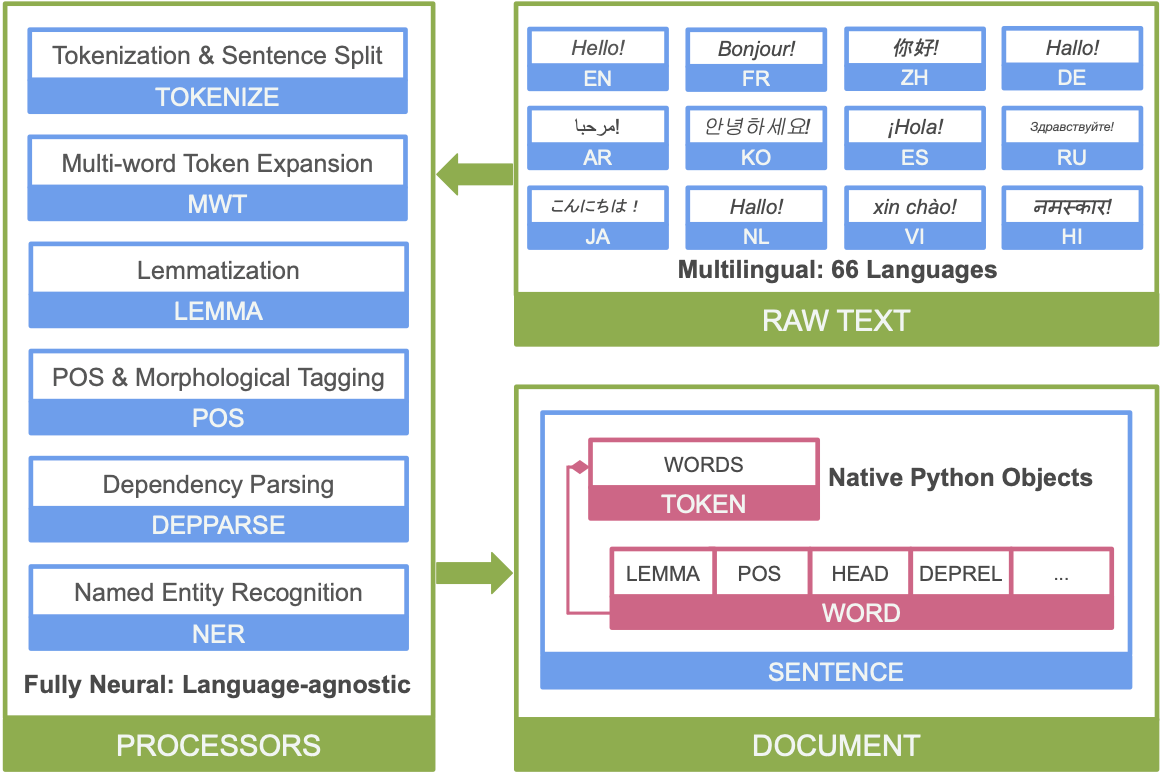

## **Installation**

In [ ]:
!python -m pip install pip --upgrade --user -q --no-warn-script-location
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels sklearn nltk stanza --user -q --no-warn-script-location


In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

## **Creating a Pipeline**

Stanza provides a plethora of pre-trained NLP models for 66 human languages that we can make use of. Downloading a pre-trained model and creating a pipeline is as easy as:

In [ ]:
import stanza
stanza.download('en')
nlp = stanza.Pipeline('en')

## **Specifying the Model Package and download directory**

By default, this downloads the default package and all processors for the language specified, English in our case, to the home directory. A language may have multiple packages trained on different datasets, for example, English has four available packages – ewt[defualt], gum, lines, and partut. 

A list of all available languages and corresponding packages can be found here.

To explicitly choose the desired package we use the package argument. And to change the download location of the model we make use of the model_dir argument.

In [ ]:
# stanza.download('en', model_dir = '/models/english/', package = 'partut')
# nlp = stanza.Pipeline('en', package = 'partut') 

## **Specifying the Processors**

Depending on the use-case one might need to specify a set of processors and the package to fetch the different processors from. There are two ways for specifying the processors argument: 

> * using a string of comma-separated processors
> * using a dictionary of processor-package pairs

### **1. Only downloading the required processors:**

To download only the required processors we can use a list of processors string like shown below

In [ ]:
stanza.download('hi', processors='tokenize,pos')
nlp = stanza.Pipeline('hi', processors='tokenize,pos') 

Downloads and loads the default tokenize (TokenizeProcessor) and pos (POSProcessor) processors for Hindi.

## **2. Specifying package names for the processors:**

In [ ]:
#Choosing the package name for processors can be done using the package argument. 
stanza.download('it', processors='tokenize,mwt', package='twittiro')
nlp = stanza.Pipeline('it', processors='tokenize,mwt', package='twittiro') 

Downloads and initializes the tokenize (TokenizeProcessor) and mwt (MWTProcessor) trained on the twittiro dataset for Italian.

We may need to specify the package for one or a few processors and keep the default package for the rest, this can be achieved using the dictionary-based processor’s argument. 

This example shows how to download and load the NERProcessor trained on the Dutch CoNLL02 dataset, but use the default package for all other processors for Dutch.

In [ ]:
stanza.download('nl', processors={'ner': 'conll02'})
nlp = stanza.Pipeline('nl', processors={'ner': 'conll02'}) 

For a more granular control over the package names for the processors, we can set the package argument to None and use the dictionary-based processor’s argument to specify the package name for each process. 

The example shows how to use a GSD TokenizeProcessor, an HDT POSProcessor,  a CoNLL03 NERProcessor, and a default LemmaProcessor for German.

In [ ]:
processor_dict = {
    'tokenize': 'gsd', 
    'pos': 'hdt', 
    'ner': 'conll03', 
    'lemma': 'default'
}
stanza.download('de', processors=processor_dict, package=None)
nlp = stanza.Pipeline('de', processors=processor_dict, package=None)

## **Creating & Overwriting Processors**

In version 1.1, Stanza added the ability to create new Processors and to overwrite existing ones using the decorator @register_processor_variant. 

In [ ]:
from stanza.pipeline.processor import Processor, register_processor, register_processor_variant
@register_processor("lowercase")
class LowercaseProcessor(Processor):
  """
  Processor that lowercases all text
  """
  _requires = set(['tokenize'])
  _provides = set(['lowercase'])
  def __init__(self, config, pipeline, use_gpu):
      pass
  def _set_up_model(self, *args):
      pass
  def process(self, doc):
      doc.text = doc.text.lower()
      for sent in doc.sentences:
          for tok in sent.tokens:
              tok.text = tok.text.lower()
          for word in sent.words:
              word.text = word.text.lower()
      return doc 

In [ ]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,lowercase')
doc = nlp("Question answering is a task where a sentence or sample of text is provided from which questions are asked and must be answered.")
s =[]
for sentence in doc.sentences:
    for word in sentence.words:
        s.append(word.text)
print(" ".join(s)) 

## **Annotating a Document**

After a pipeline has been created, we can annotate a string/document by simply passing it to the Pipeline object.

In [ ]:
stanza.download('hi')
hi_nlp = stanza.Pipeline('hi')
hindi_doc = hi_nlp("प्रश्न का उत्तर देना एक ऐसा कार्य है जहाँ एक वाक्य या पाठ का नमूना प्रदान किया जाता है जहाँ से प्रश्न पूछे जाते हैं और उसका उत्तर दिया जाना चाहिए।") 

Printing each word with its lemma and POS tag:

In [ ]:
for sentence in hindi_doc.sentences:
    for word in sentence.words:
        print("{:12s}\t{:12s}\t{:6s}".format(word.text,word.lemma, word.pos)) 

Printing all the named entities with their dependencies:

In [ ]:
for sentence in hindi_doc.sentences:
    print(sentence.ents)
    print(sentence.dependencies) 

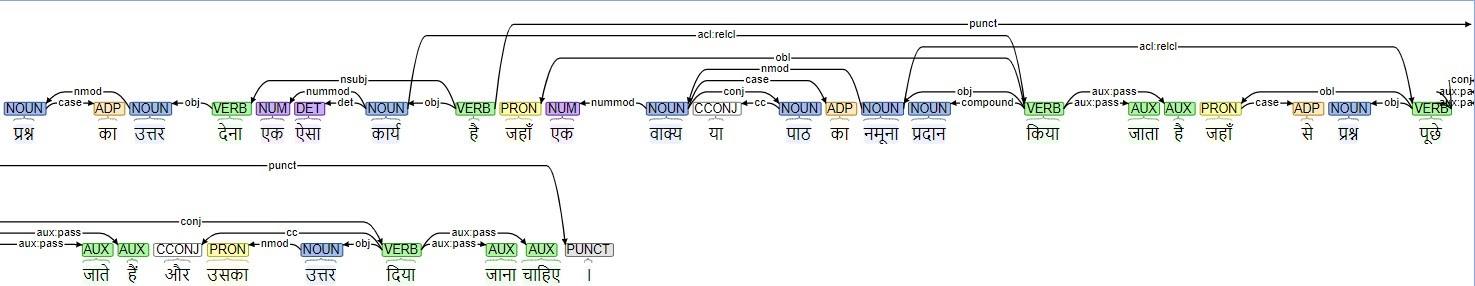

Dependencies visualized on the online demo available here: http://stanza.run/ 

## **Biomedical & Clinical Models**

Stanza also provides packages that support syntactic analysis and named entity recognition (NER) on both English biomedical literature and clinical note text. Offered packages include:

> * 2 biomedical syntactic analysis pipelines, trained with human-annotated treebanks
> * 1 clinical syntactic analysis pipeline, trained with silver data
> * 8 biomedical NER models augmented with contextualized representations
> * 2 clinical NER models, including one specialized in radiology reports.

A list of all available biomedical packages with their performance is available here

The Stanza biomedical models can be used in the same way as the normal NLP models.

The example below shows the code for downloading and initializing the i2b2 clinical NER model and annotating the various entities in a clinical note text.

In [ ]:
stanza.download('en', package='mimic', processors={'ner': 'i2b2'})
nlp = stanza.Pipeline('en', package='mimic', processors={'ner': 'i2b2'})
doc = nlp('The patient had a dry cough and fever, they were treated with Paracetamol.')
# print out the entities
for ent in doc.entities:
    print(f'{ent.text}\t{ent.type}') 

To read about it more, refer [here](https://analyticsindiamag.com/how-to-use-stanza-by-stanford-nlp-group-with-python-code/).